In [61]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import timedelta
from pmdarima.arima import auto_arima
from sklearn.metrics import root_mean_squared_error
import pickle


In [62]:
df = pd.read_csv("dataset.csv", index_col="ts", parse_dates = True)
df.head()

,id,light,temperature,soil_moisture,humidity,api_temp,precipitation,cloud_cover
ts,,,,,,,,
2025-04-01 21:15:00,1,34.3262,33.3125,3262.0,84,27.9,0.1,100
2025-04-01 21:30:00,2,33.9057,33.4688,3232.5,84,27.8,0.1,100
2025-04-01 21:45:00,3,33.2979,33.5938,3218.0,85,27.8,0.1,100
2025-04-01 22:00:00,4,33.6201,33.3281,3211.0,85,27.6,0.0,100
2025-04-01 22:15:00,5,33.2979,33.3438,3203.0,85,27.6,0.0,100


In [63]:
train_end = datetime(2025,4,9)
test_end = datetime(2025,4,11)

train_data = df[:train_end]
test_data = df[train_end:test_end]

# Training sarima to predict the temperature 

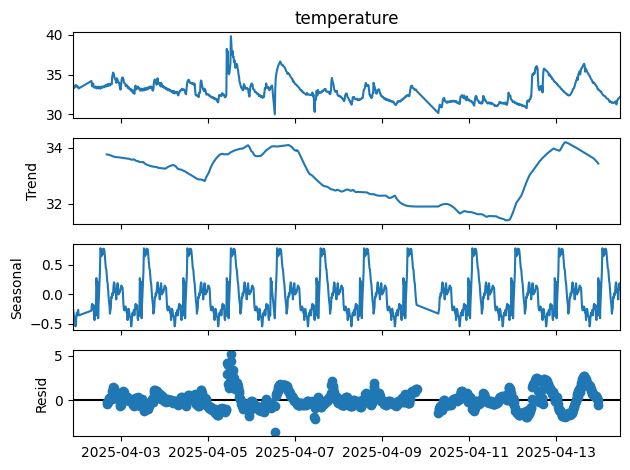

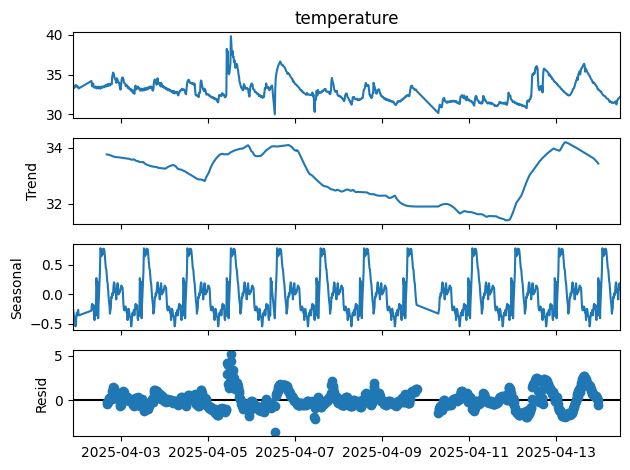

In [64]:
seasonal_decompose(df["temperature"], model="additive", period=96).plot()

## Find the D parameter

In [65]:
result = adfuller(df["temperature"].dropna(), autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -4.554523347486014
p-value: 0.00015653440877699454
Critial Values:
   1%, -3.4362020989495545
Critial Values:
   5%, -2.864124028818559
Critial Values:
   10%, -2.5681458107461737


The ADF statistics value is less than 0.05, therefore, it is stationary.

## Find the P parameter

<BarContainer object of 25 artists>

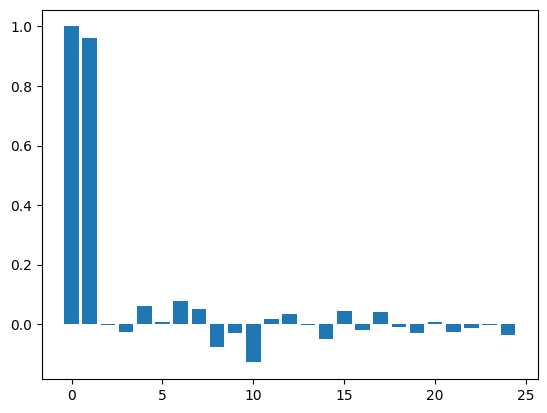

In [66]:
# I believe 2 or 3 is the variable for the term AR in order
pacf_vals = pacf(df["temperature"])
# where did 25 came from?
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

The two lags in the front are the most influential, therefore, p = 2

## Find the Q parameter

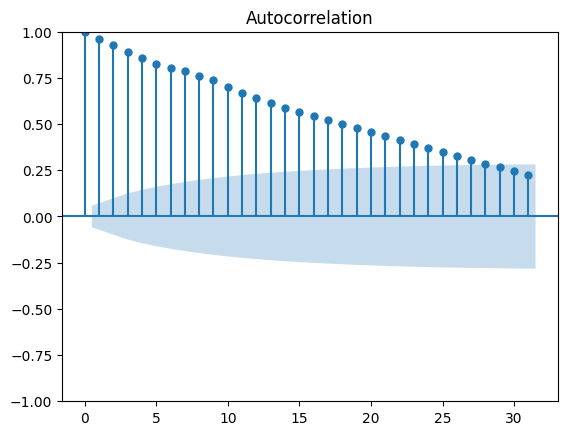

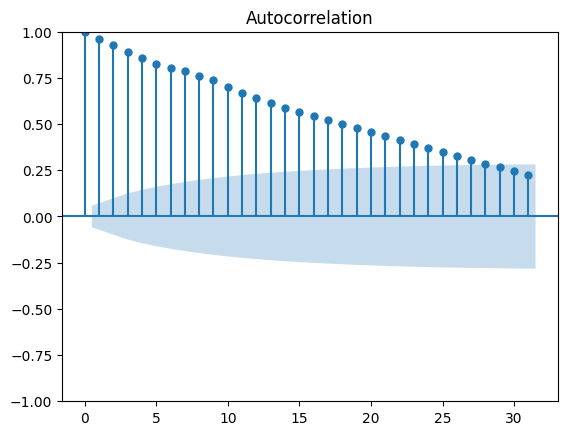

In [67]:
plot_acf(df["temperature"])

The graph is not clear, therefore, the q parameter might be 0 or 1

## Train the model

c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\si

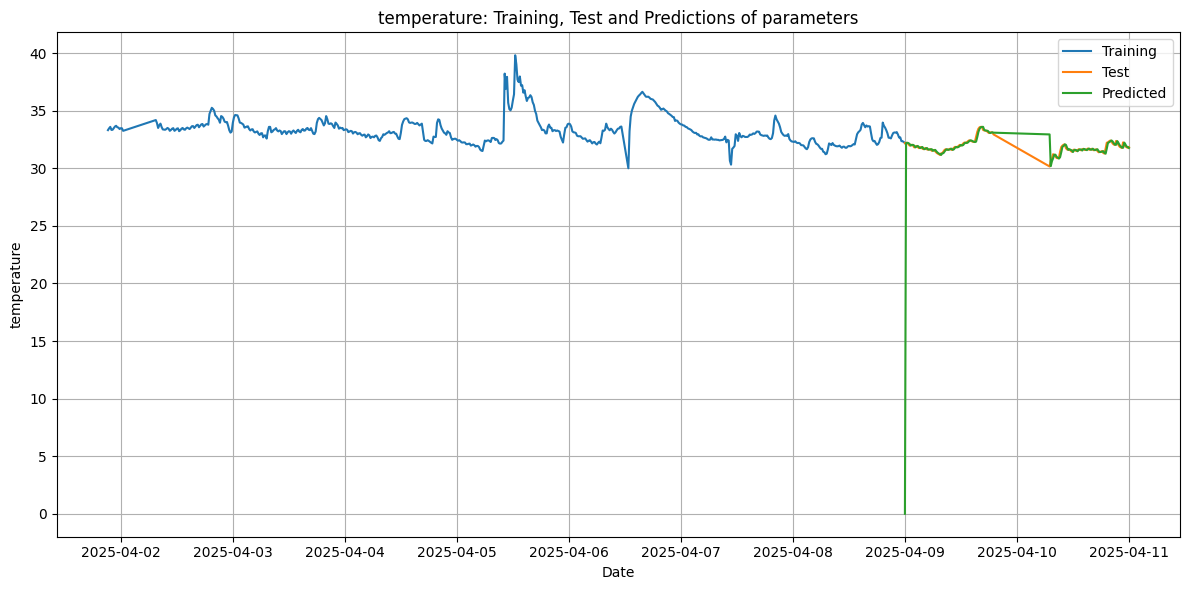

RMSE is :  2.677813422735719


In [68]:
model_temperature = SARIMAX(
    endog=test_data['temperature'],
    order=(2,0,1)
)
temperature_results = model_temperature.fit()

temperature_prediction = pd.DataFrame(temperature_results.predict(n_periods = int(test_data['soil_moisture'].count()), index=test_data.index))
temperature_prediction.columns = ['predicted']

plt.figure(figsize=(12, 6))
# Ensure datetime index and proper plotting
plt.plot(train_data.index, train_data["temperature"], label="Training")
plt.plot(test_data.index, test_data["temperature"], label="Test")
plt.plot(test_data.index, temperature_prediction, label="Predicted")  # use the same x-axis as test

plt.legend()
plt.xlabel("Date")
plt.ylabel("temperature")
plt.title(f"temperature: Training, Test and Predictions of parameters")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"RMSE is : ", root_mean_squared_error(test_data['temperature'], temperature_prediction))

## Save the model using pickle

In [69]:
with open('temperature_sarima.pkl', 'wb') as file:
    pickle.dump(temperature_results, file)

# Training sarima to predict the temperature 

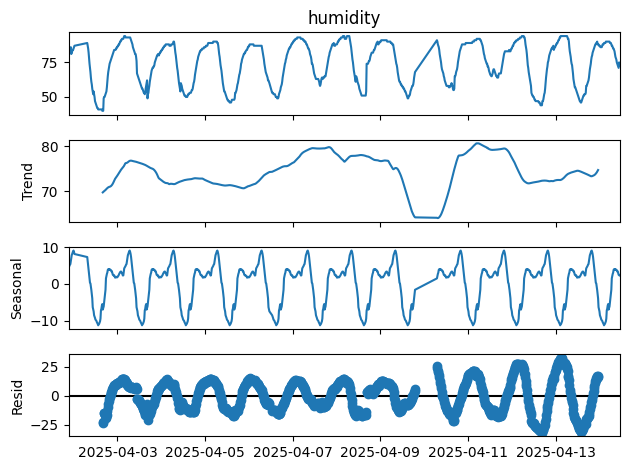

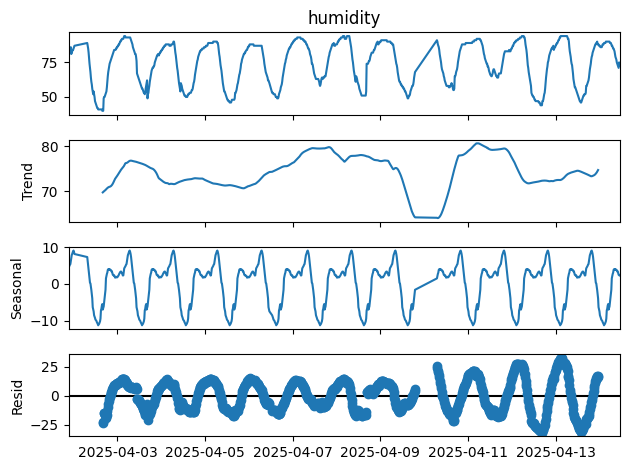

In [70]:
seasonal_decompose(df["humidity"], model="additive", period=96).plot()

## Find the D parameter

In [71]:
result = adfuller(df["humidity"].dropna(), autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -8.721444393262384
p-value: 3.3769446716428583e-14
Critial Values:
   1%, -3.4362763491428243
Critial Values:
   5%, -2.8641567820457636
Critial Values:
   10%, -2.568163254776674


The ADF statistics value is less than 0.05, therefore, it is stationary.

## Find the P parameter

<BarContainer object of 25 artists>

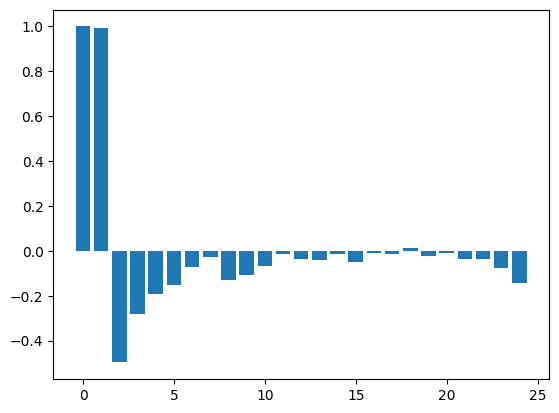

In [72]:
# I believe 2 or 3 is the variable for the term AR in order
pacf_vals = pacf(df["humidity"])
# where did 25 came from?
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

The 4 lags in the front are the most influential, therefore, p = 4

## Find the Q parameter

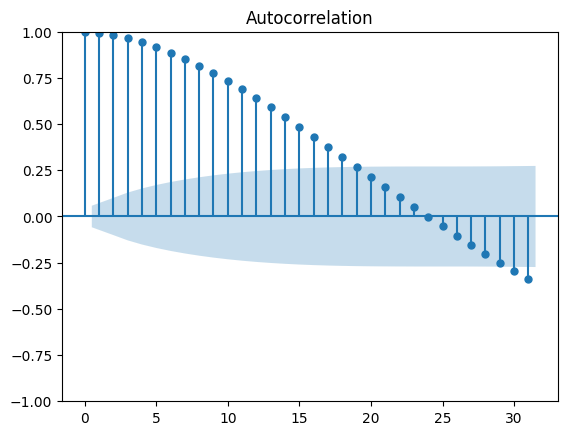

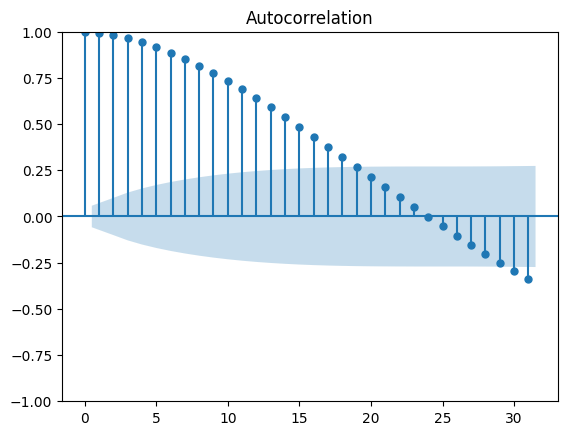

In [73]:
plot_acf(df["humidity"])

The graph is not clear, therefore, the q parameter might be 0 or 1

## Train the model

c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


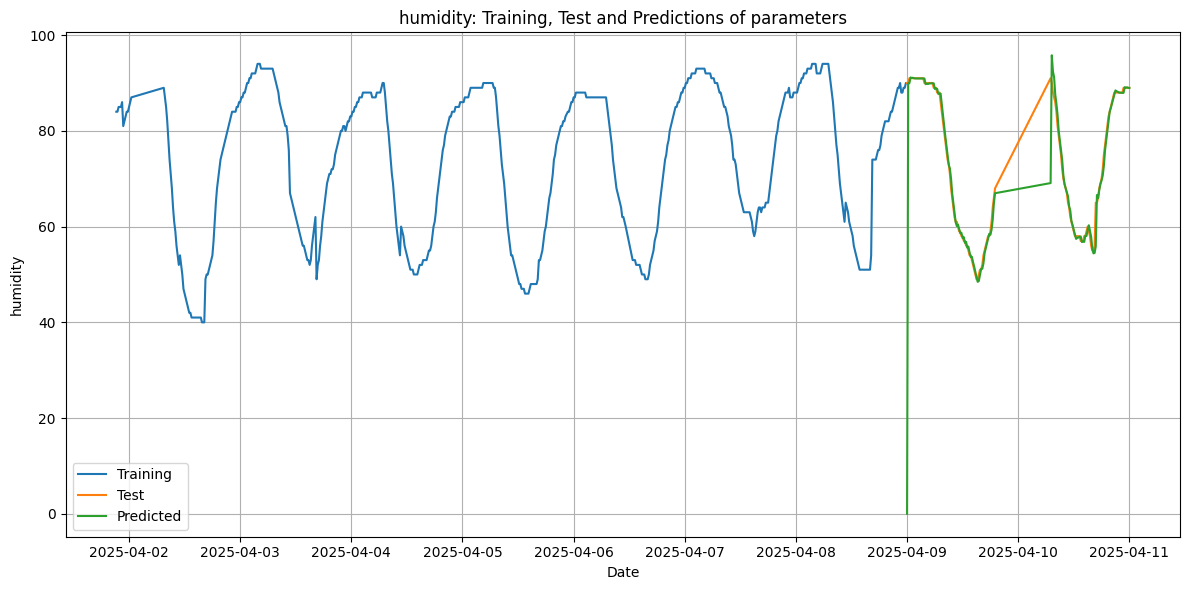

RMSE is :  7.7788297785856955


In [83]:
model_humidity = SARIMAX(
    endog=test_data['humidity'],
    order=(4,0,1)
)
humidity_results = model_humidity.fit()

humidity_prediction = pd.DataFrame(humidity_results.predict(n_periods = int(test_data['humidity'].count()), index=test_data.index))
humidity_prediction.columns = ['predicted']

plt.figure(figsize=(12, 6))
# Ensure datetime index and proper plotting
plt.plot(train_data.index, train_data["humidity"], label="Training")
plt.plot(test_data.index, test_data["humidity"], label="Test")
plt.plot(test_data.index, humidity_prediction, label="Predicted")  # use the same x-axis as test

plt.legend()
plt.xlabel("Date")
plt.ylabel("humidity")
plt.title(f"humidity: Training, Test and Predictions of parameters")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"RMSE is : ", root_mean_squared_error(test_data['humidity'], humidity_prediction))

## Save the model using pickle

In [75]:
with open('humidity_sarima.pkl', 'wb') as file:
    pickle.dump(humidity_results, file)

# Training sarima to predict the temperature 

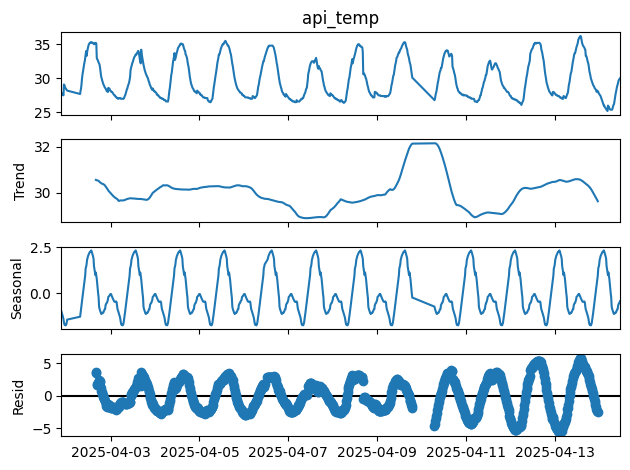

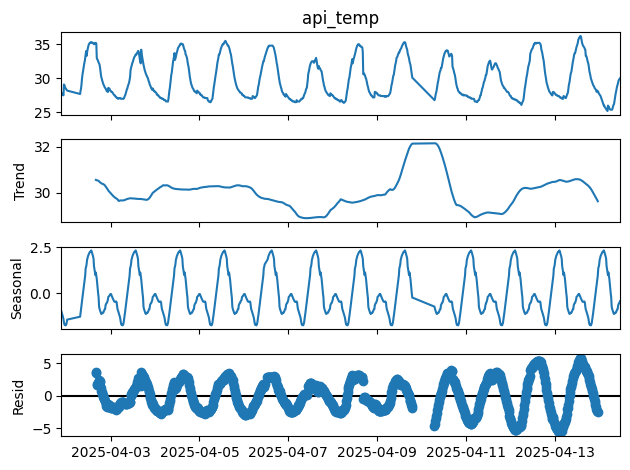

In [76]:
seasonal_decompose(df["api_temp"], model="additive", period=96).plot()

## Find the D parameter

In [77]:
result = adfuller(df["api_temp"].dropna(), autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -7.90845486890627
p-value: 4.007428495422155e-12
Critial Values:
   1%, -3.436196866494929
Critial Values:
   5%, -2.864121720649023
Critial Values:
   10%, -2.568144581443706


The ADF statistics value is less than 0.05, therefore, it is stationary.

## Find the P parameter

<BarContainer object of 25 artists>

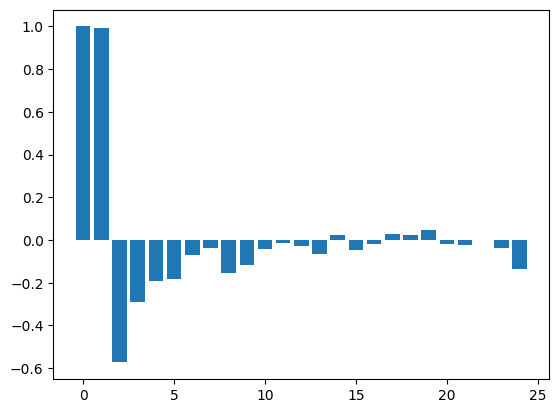

In [78]:
# I believe 2 or 3 is the variable for the term AR in order
pacf_vals = pacf(df["api_temp"])
# where did 25 came from?
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

The three lags in the front are the most influential, therefore, p = 3

## Find the Q parameter

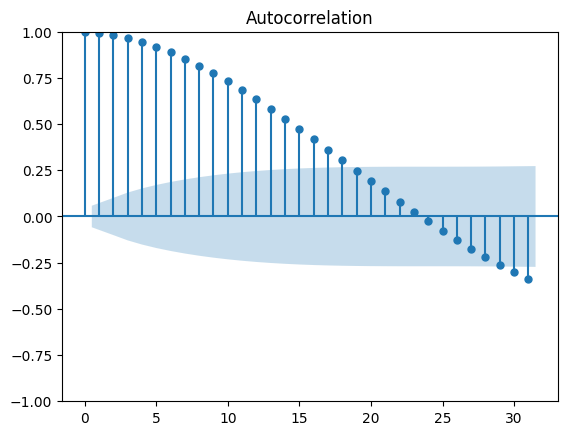

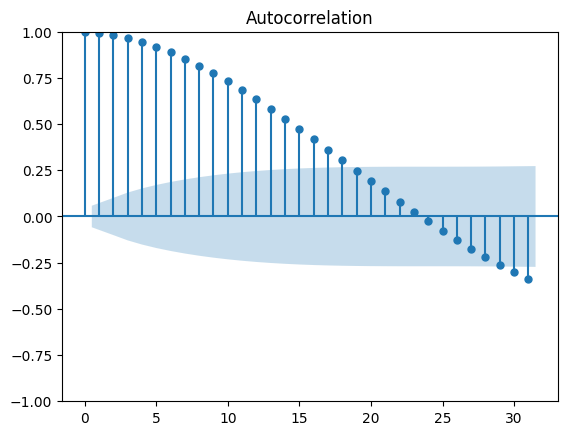

In [79]:
plot_acf(df["api_temp"])

The graph is not clear, therefore, the q parameter might be 0 or 1

## Train the model

c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


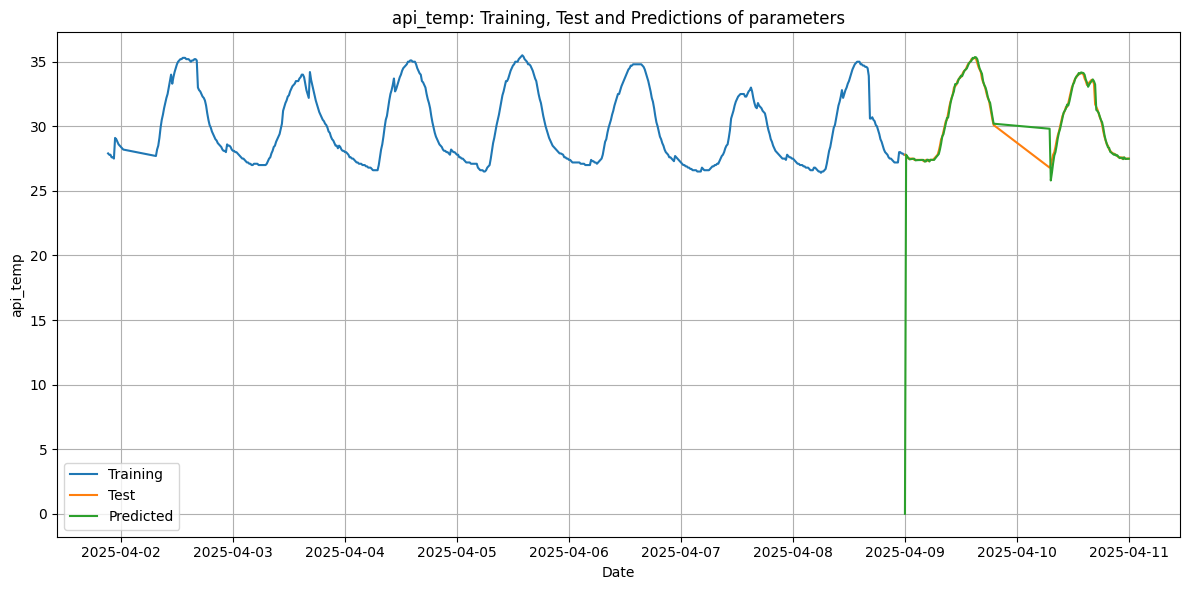

RMSE is :  2.3263198710820903


In [80]:
model_api_temp = SARIMAX(
    endog=test_data['api_temp'],
    order=(2,0,1)
)
api_temp_results = model_api_temp.fit()

api_temp_prediction = pd.DataFrame(api_temp_results.predict(n_periods = int(test_data['soil_moisture'].count()), index=test_data.index))
api_temp_prediction.columns = ['predicted']

plt.figure(figsize=(12, 6))
# Ensure datetime index and proper plotting
plt.plot(train_data.index, train_data["api_temp"], label="Training")
plt.plot(test_data.index, test_data["api_temp"], label="Test")
plt.plot(test_data.index, api_temp_prediction, label="Predicted")  # use the same x-axis as test

plt.legend()
plt.xlabel("Date")
plt.ylabel("api_temp")
plt.title(f"api_temp: Training, Test and Predictions of parameters")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"RMSE is : ", root_mean_squared_error(test_data['api_temp'], api_temp_prediction))

## Save the model using pickle

In [81]:
with open('api_temp_sarima.pkl', 'wb') as file:
    pickle.dump(api_temp_results, file)